# solution of weight initialization using Xavier initialization in tanh activation function


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'D:\copy of htdocs\practice\Python\200days\Day184 Dee[ Learning Day 14\dataset.xlsx')

In [3]:
df.head()

,X,Y,class
0,0.3160,0.9870,0
1,2.1200,-0.0462,1
2,0.8800,-0.0758,0
3,-0.0551,-0.0373,1
4,0.8300,-0.5390,1


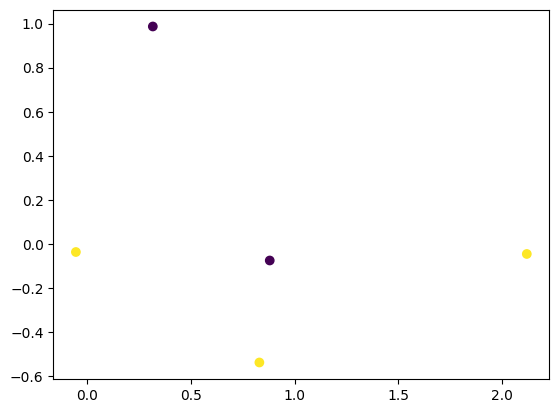

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Set parameters to 0
model.get_weights()

[array([[ 0.34370774,  0.5384521 , -0.5421312 ,  0.15906137,  0.412983  ,
          0.51196986, -0.41011512, -0.6967031 , -0.6524561 ,  0.68801457],
        [ 0.02810031,  0.24401814, -0.62784994,  0.14519233,  0.5099847 ,
          0.22077852, -0.26204786,  0.09833503,  0.09670931, -0.38512424]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.48158717, -0.51743925,  0.42300147, -0.3888141 ,  0.23888636,
          0.23322749,  0.50198114, -0.2752976 ,  0.12004048,  0.21755272],
        [ 0.4050222 , -0.25116992,  0.4245407 , -0.03340316,  0.05106574,
         -0.01178575, -0.53097004,  0.38273007, -0.3434685 , -0.10875958],
        [ 0.36052954,  0.08398211, -0.43297088, -0.30162832, -0.2722057 ,
         -0.02670354,  0.22656614, -0.04452044,  0.48187387,  0.48627627],
        [-0.21923783, -0.22368446,  0.32831877,  0.2334547 ,  0.5276158 ,
         -0.3400506 , -0.37303093,  0.2797082 ,  0.3076737 ,  0.21445036],
        [-0.37026

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)

initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)

initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)

initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[-0.21039283, -0.7145088 ,  0.35775107,  0.9066686 , -0.5839923 ,
          0.11865241, -0.23702675,  0.36272028,  0.373298  ,  0.53069776],
        [ 0.09529097,  0.40514138,  1.2146834 , -0.51284903, -1.1788965 ,
         -0.21240574,  0.7832094 ,  0.488164  ,  1.5899942 ,  0.25505912]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.25294903, -0.30823728,  0.27357933, -0.12091757,  0.21235456,
         -0.07881694,  0.5546076 , -0.26283643, -0.2972216 , -0.32815084],
        [ 0.47464103, -0.61522174,  0.11195476, -0.02333259, -0.02219454,
          0.10689442,  0.20631574,  0.22626919, -0.00936611,  0.0180017 ],
        [-0.5751377 , -0.311845  ,  0.11461915,  0.15472919,  0.25877875,
         -0.07618985,  0.02029402, -0.03733406,  0.84473187,  0.24021392],
        [ 0.42459747,  0.45083073, -0.042017  ,  0.35367045,  0.3024781 ,
          0.5783092 , -0.18689178,  0.55527234,  0.12255041, -0.0599154 ],
        [ 0.17474

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100


1/1 [==============================] - 1s 950ms/step - loss: 0.6919 - accuracy: 0.5000 - val_loss: 0.6500 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 0.6895 - accuracy: 0.5000 - val_loss: 0.6431 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 0.6871 - accuracy: 0.5000 - val_loss: 0.6363 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 0.6847 - accuracy: 0.7500 - val_loss: 0.6296 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 0.6824 - accuracy: 0.7500 - val_loss: 0.6231 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 0.6801 - accuracy: 0.7500 - val_loss: 0.6167 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 33ms/step - loss: 0.6778 - accuracy: 0.7500 - val_loss: 0.6105 - val_accuracy: 1.0000
Epoch 8/100
1/1 [==============

In [15]:
model.get_weights()

[array([[-0.22488591, -0.83426225,  0.39529213,  0.7914926 , -0.7256236 ,
          0.11453227, -0.27105287,  0.49832016,  0.4186377 ,  0.4379386 ],
        [ 0.17856966,  0.3127659 ,  1.1405932 , -0.5817616 , -1.2065191 ,
         -0.2992225 ,  0.8432508 ,  0.56726557,  1.4921594 ,  0.16422543]],
       dtype=float32),
 array([-0.07056522,  0.03509907, -0.08845238,  0.09909699,  0.02672916,
        -0.0038715 , -0.09269557,  0.06555468, -0.05178567, -0.11448427],
       dtype=float32),
 array([[-0.34088567, -0.38554177,  0.3972557 , -0.19051278,  0.15870756,
         -0.19472408,  0.42376032, -0.19220059, -0.367603  , -0.46104258],
        [ 0.4776929 , -0.5317497 ,  0.00287358,  0.07644081, -0.16028567,
          0.03317497,  0.18640654,  0.20609301, -0.04014366,  0.11384206],
        [-0.5265456 , -0.27663082,  0.18515673,  0.09255469,  0.3888046 ,
          0.00523577,  0.00287521,  0.04219571,  0.8094464 ,  0.16953121],
        [ 0.41699523,  0.40482157,  0.04987895,  0.26872328, 

9600/9600 [==============================] - 7s 735us/step


<Axes: >

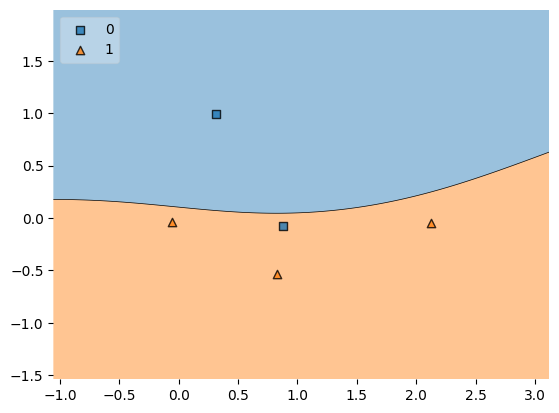

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)